In [1]:
import tools
import cartesian
import racks
import calibration
import low_level_comm as llc
import samples
import importlib

In [2]:
llc.listSerialPorts()

['COM3', 'COM6', 'COM10']

# Rack for the gripper

1. Manually install the rack
    - Here it is insatlled at 5, 1
2. Add config file for the rack to the folder "config".
    - saved in /config/plate_gripper_rack.ini
    - You can open similar instrument's file and save with a new name
3. Adjust geometry section (just physically measure parameters
4. Check that wells settings correspond to single well
5. Change settings for calibration section

## Creating the rack

In [3]:
plate_gripper_rack = racks.rack(rack_name='plate_gripper_rack', rack_type='plate_gripper_rack', x_slot=5, y_slot=1)

In [11]:
plate_gripper_rack.rack_data

{'name': 'plate_gripper_rack',
 'n_x': 5,
 'n_y': 1,
 'type': 'plate_gripper_rack'}

## Calibrate the rack

In [4]:
ar = cartesian.arnie(cartesian_port="COM10", docker_port="COM6")

In [5]:
ar.home()

In [6]:
stp = tools.stationary_touch_probe(ar)

In [6]:
tp = tools.mobile_touch_probe.getTool(ar)

In [7]:
x, y, z = calibration.calibrateStationaryProbe(tp, stp)

In [8]:
ar.move(z=300)

In [12]:
xr, yr, zr = calibration.calibrateRack(tp, plate_gripper_rack)

In [13]:
plate_gripper_rack.rack_data

{'name': 'plate_gripper_rack',
 'n_x': 5,
 'n_y': 1,
 'type': 'plate_gripper_rack',
 'position': [840.54, 175.60000000000002, 563.05],
 'pos_stalagmyte': [93.95, 66.25, 491.45]}

In [14]:
tp.returnTool()

In [25]:
ar.home()

# Gripper settings

In [3]:
ar = cartesian.arnie(cartesian_port="COM10", docker_port="COM6")

In [4]:
ar.home()

In [5]:
stp = tools.stationary_touch_probe(ar)

## Obtaining rack position

In [6]:
plate_gripper_rack = racks.rack(rack_name='plate_gripper_rack', rack_type='plate_gripper_rack')

In [71]:
x, y, z = plate_gripper_rack.rack_data['position']

In [72]:
x, y, z

(840.54, 175.60000000000002, 563.05)

In [73]:
ar.move(x=x, y=y)

In [74]:
ar.openTool()

In [75]:
plate_gripper_rack.z_working_height

-41.0

In [56]:
plate_gripper_rack.z_working_height = -41

In [76]:
z_final = z - plate_gripper_rack.z_working_height

In [77]:
z_final

604.05

In [82]:
ar.move(z=z_final)

In [60]:
ar.closeTool()

In [13]:
ar.move(z=300)

In [62]:
ar.closeTool()

In [63]:
ar.move(z=z_final)

In [64]:
ar.openTool()

In [83]:
ar.move(z=300)

## Creating plate gripper settings file

# Writing class for mobile plate gripper

In [66]:
# TODO: Need to merge with a mobile gripper, but need to make sure nothing breaks

In [84]:
class plate_gripper(tools.mobile_gripper):
    def __init__(self, robot, com_port_number=None, 
                 tool_name='plate_gripper', tool_type=None, rack_name=None, rack_type='plate_gripper_rack', 
                 welcome_message='mobile plate gripper'):
        super().__init__(robot, com_port_number=com_port_number, 
                 tool_name=tool_name,
                 welcome_message=welcome_message)
    
    @classmethod
    def getTool(cls, robot):
        """
        Get touch probe from its saved position and initializes the object
        """
        cls.tool_name = "plate_gripper"
        cls.welcome_message="mobile plate gripper"
        return super().getTool(robot, 
            tool_name="plate_gripper", welcome_message="mobile plate gripper", rack_type='plate_gripper_rack')
    

In [6]:
pg = tools.mobile_gripper.getTool(robot=ar, 
                                  tool_name='plate_gripper', 
                                  rack_type='plate_gripper_rack', 
                                  welcome_message='mobile plate gripper')

In [6]:
pg = tools.mobile_gripper(robot=ar, 
                                  tool_name='plate_gripper', 
                                  rack_type='plate_gripper_rack', 
                                  welcome_message='mobile plate gripper')

## Manually adjusting calibration parameters

In [32]:
pg.immobile_probe_calibration_points['x_Xfrontal'] = -35
pg.immobile_probe_calibration_points['x_Xrear'] = 32
pg.immobile_probe_calibration_points['raise_z'] = 42
pg.immobile_probe_calibration_points['z_Y'] = -20
pg.immobile_probe_calibration_points['y_Yfrontal'] = -53.0
pg.immobile_probe_calibration_points['y_Yrear'] = 53.0

In [33]:
pg.immobile_probe_calibration_points

{'x_Xfrontal': -35,
 'x_Xrear': 32,
 'y_X': 0.0,
 'z_X': 4.0,
 'x_Y': 0.0,
 'y_Yfrontal': -53.0,
 'y_Yrear': 53.0,
 'z_Y': -20,
 'raise_z': 40,
 'dx_Z': 0.0,
 'dy_Z': -40.0}

## Trying calibration

In [24]:
ar.move(z=300)

In [11]:
pg.operateGripper(0)

In [34]:
calibration.calibrateToolCustomPoints(tool=pg, stationary_probe=stp)

(92.9, 67.65, 500.6)

In [10]:
ar.move(z=300)

# Attempting to grab the rack manually

In [24]:
importlib.reload(racks)

<module 'racks' from 'c:\\Users\\sergi\\Dropbox\\workspace\\arnielib\\racks.py'>

In [25]:
# Initializing plate
p = samples.plate('test_plate', 'PCR_Plate')
rack96well = racks.rack(rack_name='96well_rack', rack_type='96wells_rack')
p.place(rack96well)

In [26]:
p.plate_data['rack'].rack_data

{'name': '96well_rack',
 'n_x': 2,
 'n_y': 3,
 'type': '96wells_rack',
 'position': [390.15, 395.85, 508.4],
 'pos_stalagmyte': [93.15, 65.7, 491.15]}

In [28]:
x, y, z = rack96well.calcRackCenterFullCalibration(pg)

In [61]:
ar.move(x=x, y=y)

In [38]:
pg.operateGripper(0)

In [62]:
ar.move(z=513)

In [54]:
pg.operateGripper(5, powerdown=False)

In [74]:
ar.move(z=300)

In [10]:
pg.operateGripper(25)

In [69]:
pg.returnTool()

In [53]:
ar.home()

# Calibrating gripper servo motion vs. width of opening

In [1]:
ar.home()

NameError: name 'ar' is not defined

In [72]:
pg = tools.mobile_gripper.getTool(robot=ar, 
                                  tool_name='plate_gripper', 
                                  rack_type='plate_gripper_rack', 
                                  welcome_message='mobile plate gripper')

In [77]:
calibration.calibrateToolCustomPoints(tool=pg, stationary_probe=stp)

(92.6, 68.0, 531.7)

In [23]:
ar.move(z=0)

In [24]:
ar.move(x=800)

In [26]:
ar.move(y=200)

In [86]:
pg.operateGripper(25)

In [87]:
gripper_diam_vs_angle = {
    0: 74,
    10: 81,
    20: 87,
    30: 94,
    40: 100,
}

In [88]:
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

C:\Users\sergi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [89]:
df = pd.DataFrame({'diameter': gripper_diam_vs_angle})

In [90]:
df = df.reset_index()

In [91]:
df = df.rename(columns={"index": "angle"})

In [92]:
df

,angle,diameter
0,0,74
1,10,81
2,20,87
3,30,94
4,40,100


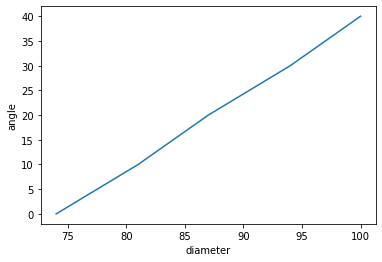

In [93]:
ax = sns.lineplot(x="diameter", y="angle", ci=68, data=df)

In [94]:
def f(x, A, B): # this is your 'straight line' y=f(x)
    return A*x + B

In [95]:
popt, pcov = curve_fit(f, df.diameter, df.angle) # your data x, y to fit

In [96]:
k = popt[0]
b = popt[1]

In [97]:
k, b

(1.5373699150407487, -114.05865659155329)

In [100]:
75 * k + b

1.2440870365028616

In [101]:
100 * k + b

39.67833491252158

In [102]:
# 96 wells plate width
77 * k + b

4.318826866584359

In [103]:
# Saving constants
pg.setAngleToDiameterConstants(slope=1.5373699150407487, intercept=-114.05865659155329)

In [107]:
# Testing gripper toDiameter() function
pg.toDiameter(77)

In [1]:
pg.toDiameter(90)

NameError: name 'pg' is not defined

# Set parameters for plate pickup

In [12]:
pg = tools.mobile_gripper.getTool(robot=ar, 
                                  tool_name='plate_gripper', 
                                  rack_type='plate_gripper_rack', 
                                  welcome_message='mobile plate gripper')

In [2]:
pg.operateGripper(0)

NameError: name 'pg' is not defined

In [22]:
calibration.calibrateToolCustomPoints(tool=pg, stationary_probe=stp)

(92.75, 68.6, 501.7)

In [19]:
pg.immobile_probe_calibration_points['x_Xfrontal'] = -35
pg.immobile_probe_calibration_points['x_Xrear'] = 28
pg.immobile_probe_calibration_points['raise_z'] = 42
pg.immobile_probe_calibration_points['z_Y'] = -20
pg.immobile_probe_calibration_points['y_Yfrontal'] = -53.0
pg.immobile_probe_calibration_points['y_Yrear'] = 53.0

In [20]:
pg.immobile_probe_calibration_points

{'x_Xfrontal': -35,
 'x_Xrear': 28,
 'y_X': 0.0,
 'z_X': 4.0,
 'x_Y': 0.0,
 'y_Yfrontal': -53.0,
 'y_Yrear': 53.0,
 'z_Y': -20,
 'raise_z': 42,
 'dx_Z': 0.0,
 'dy_Z': -40.0}

In [38]:
importlib.reload(samples)

<module 'samples' from 'c:\\Users\\sergi\\Dropbox\\workspace\\arnielib\\samples.py'>

In [35]:
# Initializing plate
p = samples.plate('test_plate', 'PCR_Plate')
rack96well = racks.rack(rack_name='96well_rack', rack_type='96wells_rack')
p.place(rack96well)

In [39]:
magrack96well = racks.rack(rack_name='96well_rack_magnetic', rack_type='96wells_rack')

In [37]:
pg.toDiameter(90)

In [36]:
ar.move(z=300)

In [49]:
pg.grabSample(sample=p, man_open_diam=90, man_grip_diam=77)

In [37]:
pg.gripper_has_something = False

In [50]:
pg.placePlate(rack=magrack96well, man_open_diam=90)

In [53]:
pg.placePlate(rack=rack96well, man_open_diam=90)

In [52]:
pg.grabSample(sample=p, man_open_diam=90, man_grip_diam=77)

In [44]:
ar.move(z=300)

In [36]:
pg.gripper_has_something

True

In [54]:
pg.pushSample(sample=p, man_open_diam=77)

## Picking up and placing several times

In [55]:
for i in range(5):
    pg.grabSample(sample=p, man_open_diam=90, man_grip_diam=77)
    pg.placePlate(rack=magrack96well, man_open_diam=90)
    pg.pushSample(sample=p, man_open_diam=70)
    pg.grabSample(sample=p, man_open_diam=90, man_grip_diam=77)
    pg.placePlate(rack=rack96well, man_open_diam=90)
    pg.pushSample(sample=p, man_open_diam=70)

In [23]:
pg.toDiameter(90)

In [24]:
pg.returnTool()

In [25]:
ar.home()

In [8]:
ar.move(z=0)

In [11]:
ar.openTool()